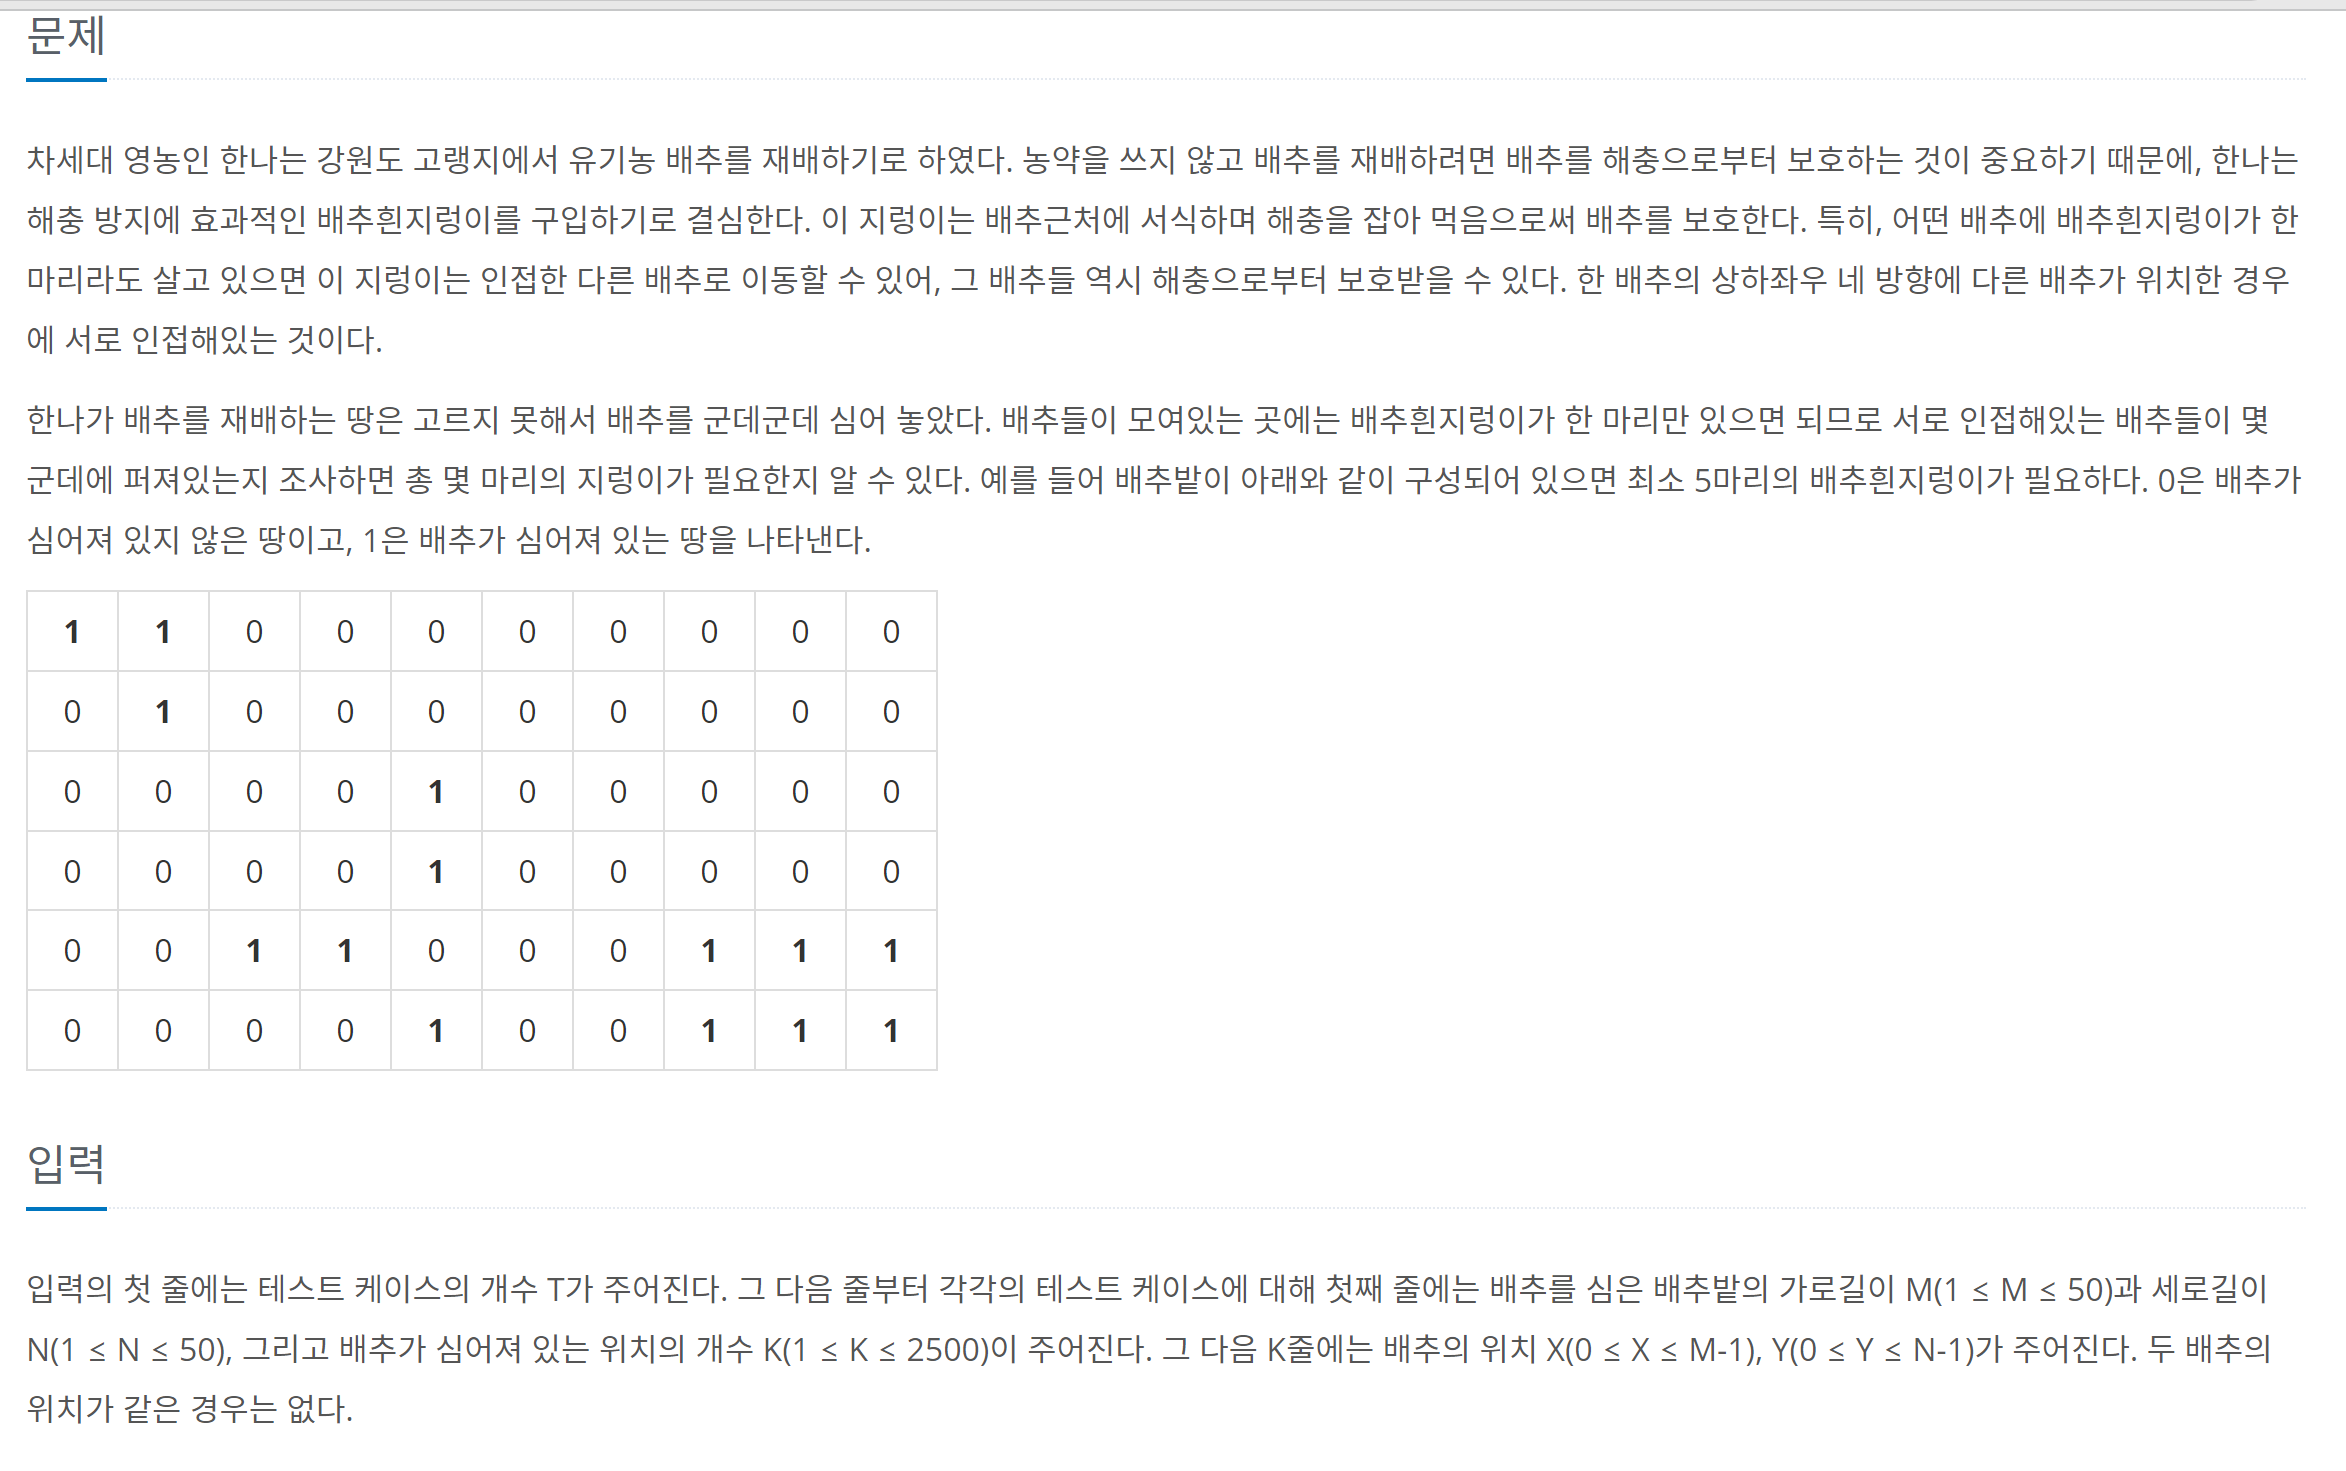

상당히 긴 문제지만 핵심은 배추들이 인접해있는지 그렇지 않은지를 파악하는 것이다.

In [4]:
import sys
sys.setrecursionlimit(10000)

trial = int(input())

m,n,k = map(int, input().split())

for _ in range(trial):
    baechoo=[]
    count = 1
    for i in range(k):
        x,y = map(int, input().split())
        where = [x,y]
        baechoo.append(where)
        if(i>=2):
            distance = abs(baechoo[-2][0]-baechoo[-1][0])+abs(baechoo[-2][1]-baechoo[-1][1])
            if distance > 1 :
                count+=1
    print(count)

1
5 3 6
0 2
1 2
2 2
3 2
4 2
4 0
1


처음엔 이런식으로 쉽게 풀 줄 알았으나 생각해보니 배추의 위치를 저렇게 가지런하게 줄 리가 없었다.
그래서 구글링을 해보니 DFS, BFS 등의 탐색 알고리즘을 사용해야 했다.
데이터구조론 시간에 배워서 내용을 알고 있어 적용해보았다.

In [6]:
import sys
sys.setrecursionlimit(10000)

# dfs
def dfs(i, j):
    # 상하좌우
    for nx, ny in ((i-1, j), (i, j-1), (i+1, j), (i, j+1)):
        if 0 <= nx < M and 0 <= ny < N and bat[nx][ny] == 1:
            bat[nx][ny] = 0
            dfs(nx, ny)

# input
for testcase in range(int(input())):
    count = 0
    M, N, K = map(int, input().split())
    bat = [[0]*N for _ in range(M)]
    for row in range(K):
        x, y = map(int, input().split())
        bat[x][y] = 1

    # main
    for i in range(M):
        for j in range(N):
            if bat[i][j] == 1:
                count += 1
                bat[i][j] = 0
                dfs(i, j)

    print(count)

1
5 3 6
0 2
1 2
2 2
3 2
4 2
4 0


NameError: name 'ans' is not defined

많은 코드들을 살펴보았는데 위의 방식이 참 마음에 들었다. 우선 함수 dfs 먼저 보자. 1을 한 번 발견하면, 재귀적으로 알고리즘이 돌아가면서 인접한 1을 모두 찾아낸다. (상하좌우로) 그리고 main 함수에서는 1인 영역을 찾아내면 바로 count를 더한 다음,  0으로 바꾸고 dfs를 돌려서 그 배추와 인접한 영역들을 모두 0으로 바꾼다. 이러면 탐색을 돌아가면서 구역당 한 번만 카운트 할 수 있기 때문에 아주 깔끔한 방식이라고 생각한다.